In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step by step walktrough of how to use DeMethify with bedmethyl files (modkit output style)

Here are the different steps:
- Preprocessing:
    - Feature selection, choosing the n CpG sites of the reference matrix with the highest variance (see /preprocessing/preprocessing.ipynb)
    - Bed files intersection, making the CpG sites consistent across the reference and the samples (see /preprocessing/preprocessing.ipynb)

- Deconvolution

## DeMethify use cases

Once the bed files ready, we can finally use DeMethify:

In [1]:
## If demethify is not yet installed
#!pip install git+https://github.com/cortes-ciriano-lab/DeMethify

In [2]:
!demethify -h

usage: demethify [-h] --methfreq METHFREQ [METHFREQ ...] [--ref [REF]]
                 [--iterations ITERATIONS ITERATIONS] [--nbunknown NBUNKNOWN]
                 [--termination TERMINATION] [--init [INIT]] --outdir [OUTDIR]
                 [--fillna] [--ic [IC]] [--confidence CONFIDENCE CONFIDENCE]
                 [--plot] [--bedmethyl | --counts COUNTS [COUNTS ...] |
                 --noreadformat]

DeMethify - Partial reference-based Methylation Deconvolution

options:
  -h, --help            show this help message and exit
  --methfreq METHFREQ [METHFREQ ...]
                        Methylation frequency file path (values between 0 and
                        1)
  --ref [REF]           Methylation reference matrix file path
  --iterations ITERATIONS ITERATIONS
                        Numbers of iterations for outer and inner loops
                        (default = 10000, 20)
  --nbunknown NBUNKNOWN
                        Number of unknown cell types to estimate
  --terminat

There are several use cases for DeMethify, first of all since we're dealing with bedmethyl files here we're gonna use the --bedmethyl flag to make things smoother. 

Here are different examples:

### Reference based

For example, if we want to use DeMethify as a reference-based algorithm, without estimating any unknown cell types we can:

In [3]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq \
    output_gen/sample* \
    --bedmethyl \
    --outdir output_ref_based \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

All demethified! Results in /Users/mbourdim/Desktop/demethify_/output_ref_based
Plots generated in /Users/mbourdim/Desktop/demethify_/output_ref_based/plots


The --plot flag generates the following proportion estimates visualisation:

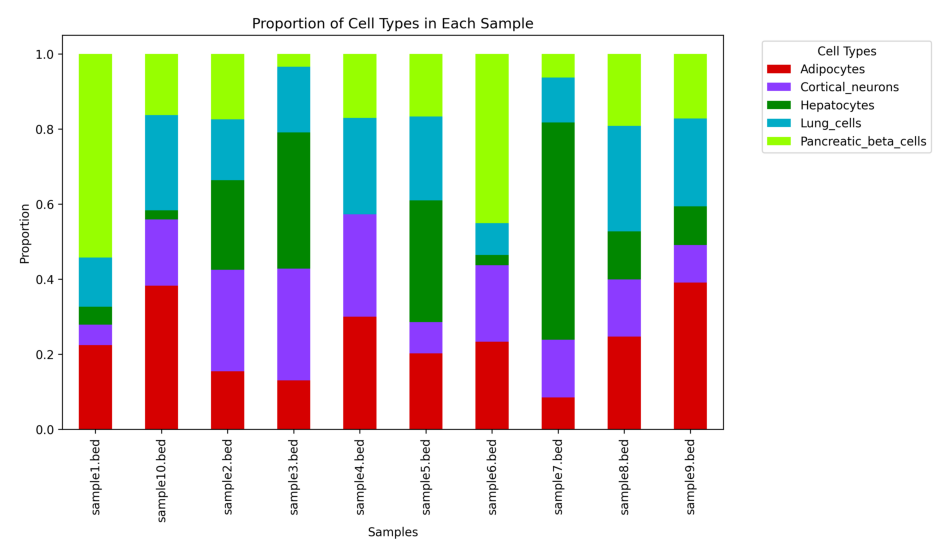

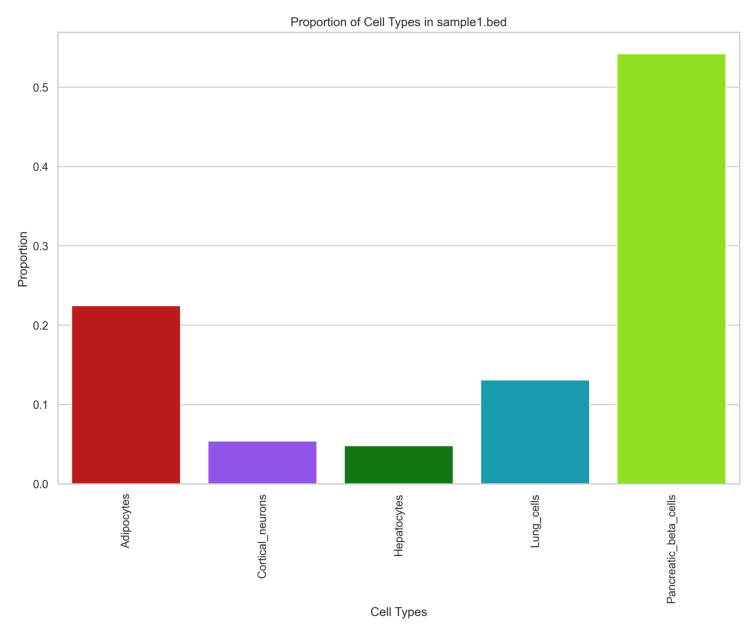

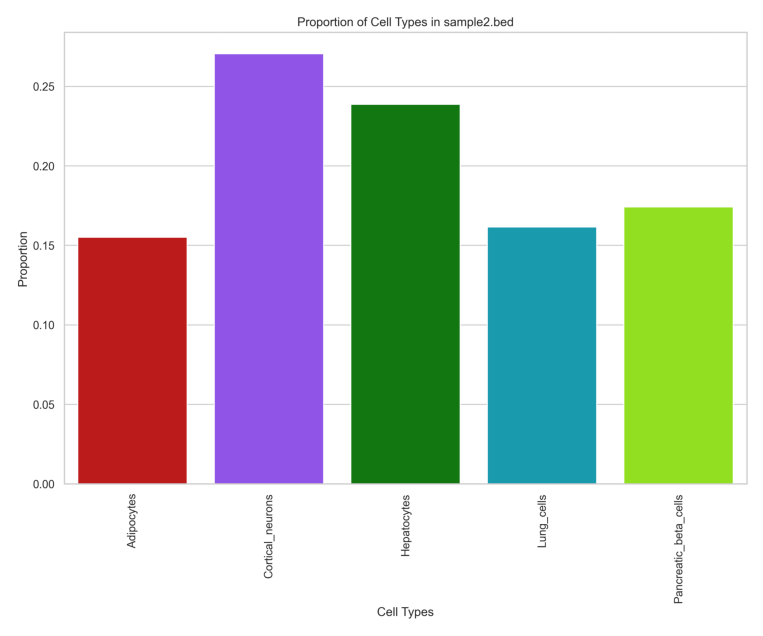

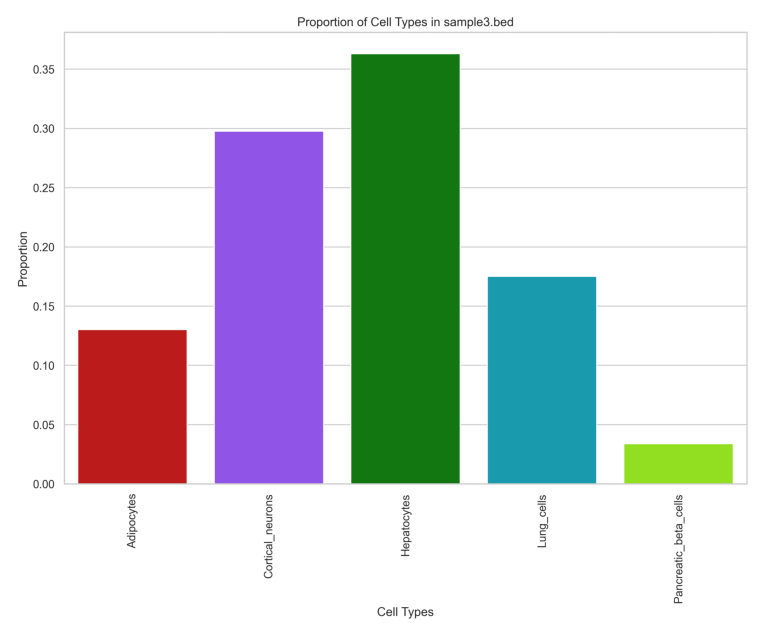

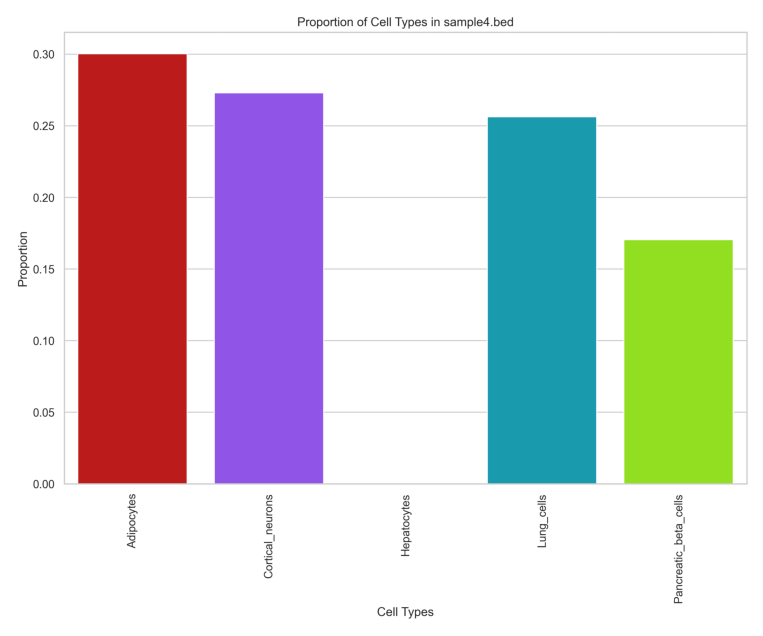

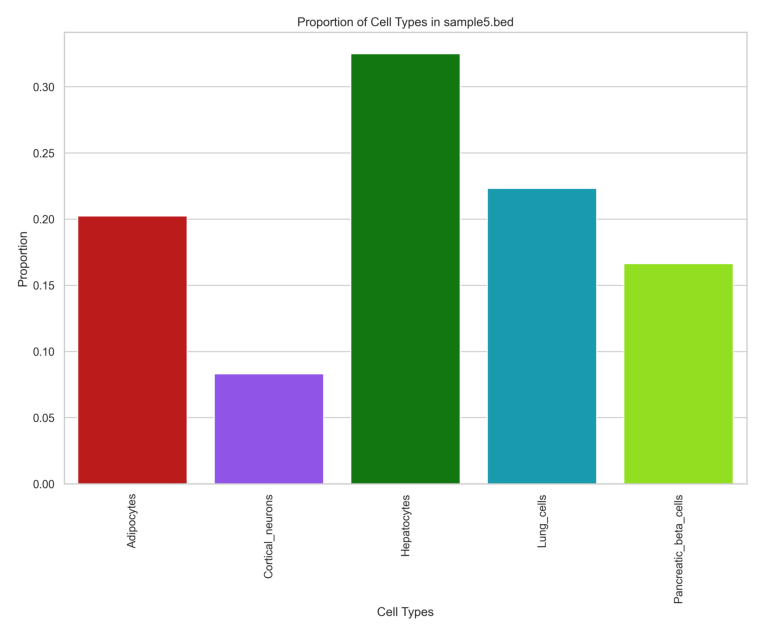

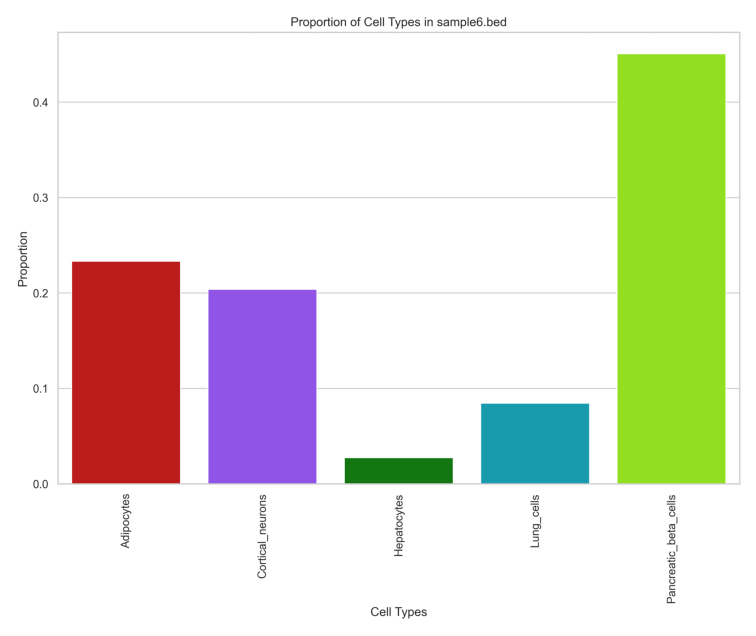

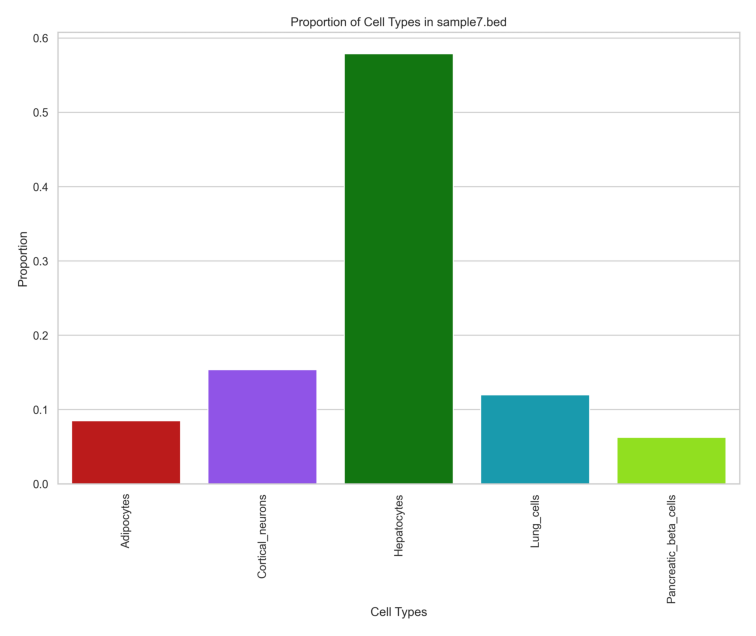

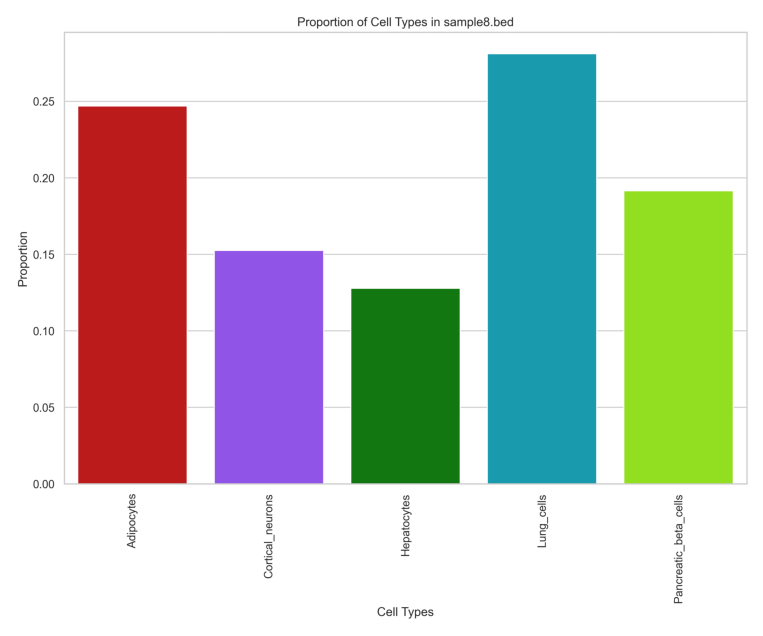

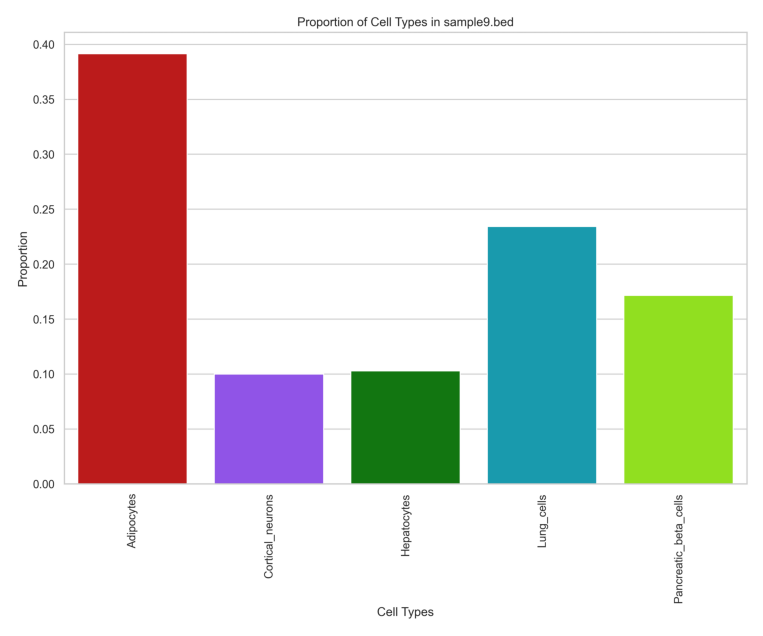

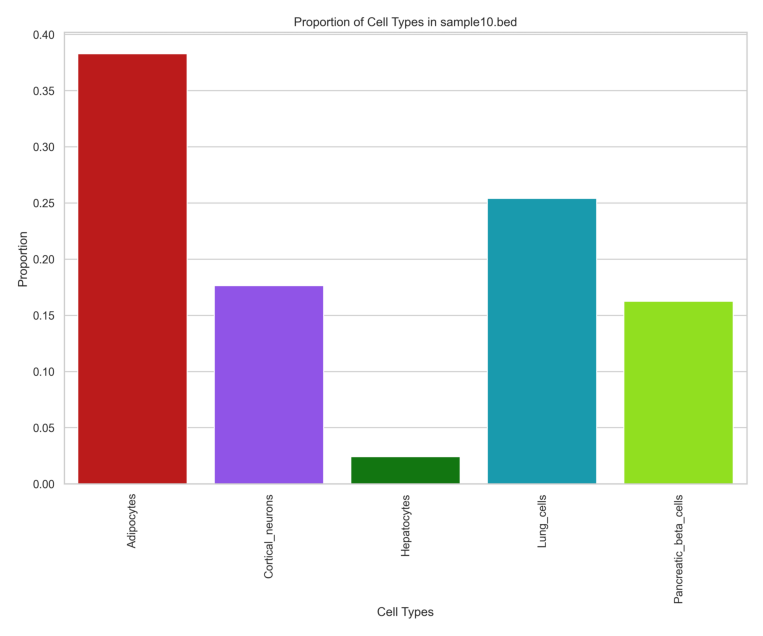

In [4]:
img = mpimg.imread('output_ref_based/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('output_ref_based/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Partial-reference based

We can also run DeMethify when we only know some cell types of the mixture.

We need to specify the number of unknown cell types that we want to estimate an DeMethify jointly estimates their methylation profiles and all of the known and unknown cell types proportions. 

The --init flag corresponds to the method of initialisation for the partial-reference based algorithm, there are 3 options:
- Uniform, where the methylation profile gets initialised with a uniform distribution
- ICA, where the methylation profile gets initialised with Independent Component Analysis
- SVD, where the methylation profile gets initialised with Singular Value Decomposition

The ICA method seems to be recommended by the literature, but it can sometimes be too slow in practice, especially for computationally intensive procedures such as the bootstrap. 

In [5]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq \
    output_gen/sample* \
    --bedmethyl \
    --nbunknown 1 \
    --init SVD \
    --outdir output_partial_ref \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

All demethified! Results in /Users/mbourdim/Desktop/demethify_/output_partial_ref
Plots generated in /Users/mbourdim/Desktop/demethify_/output_partial_ref/plots


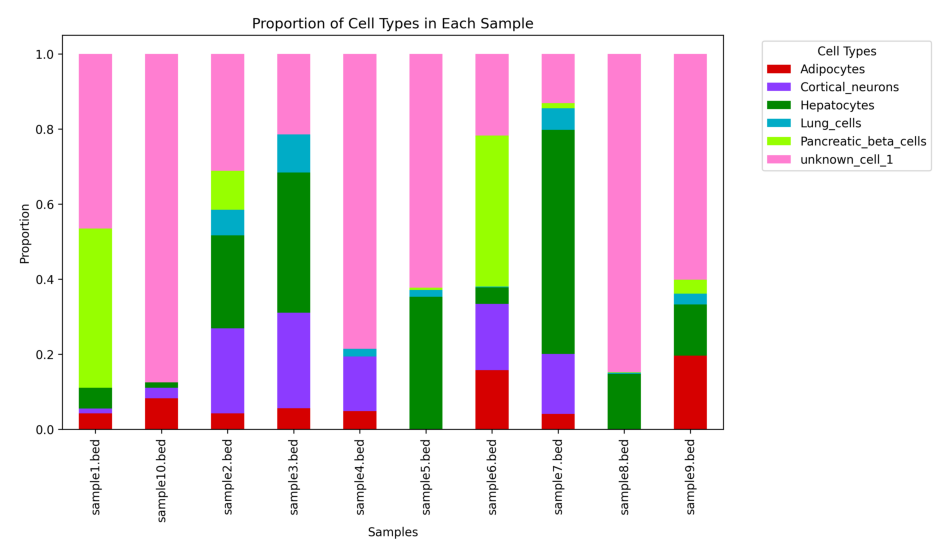

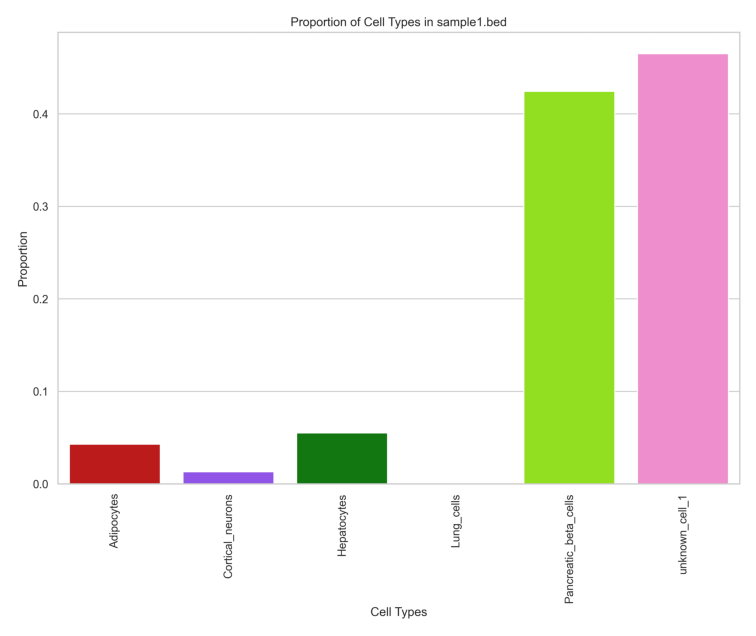

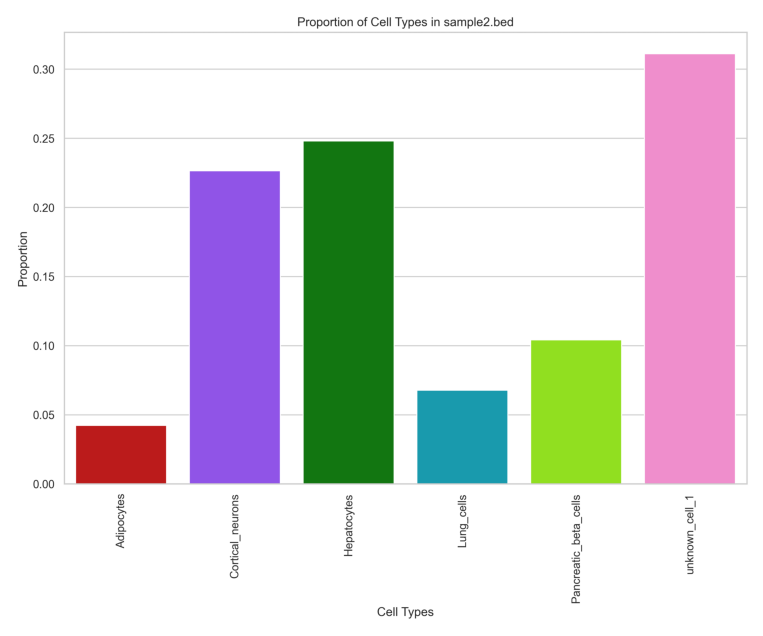

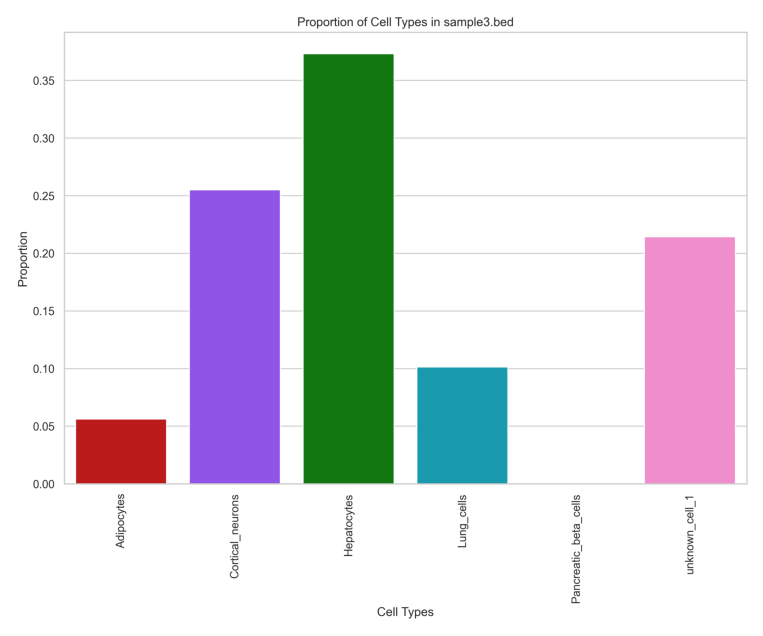

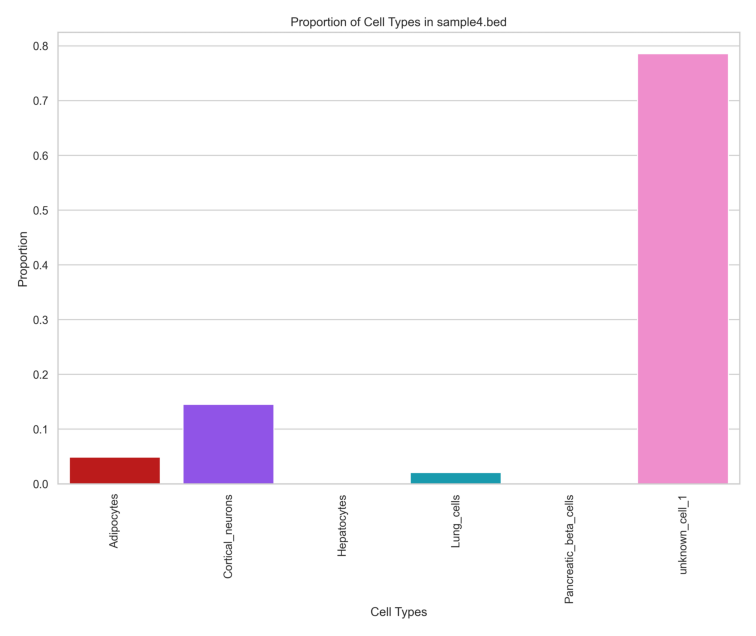

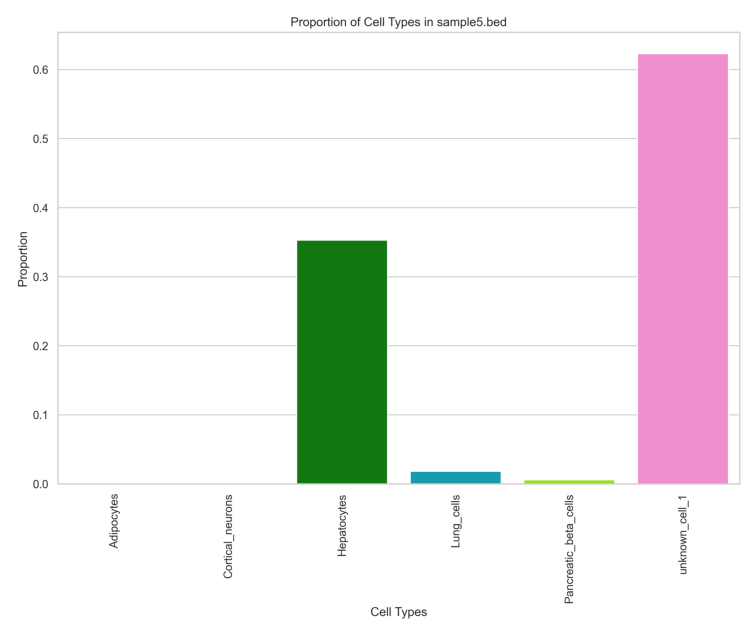

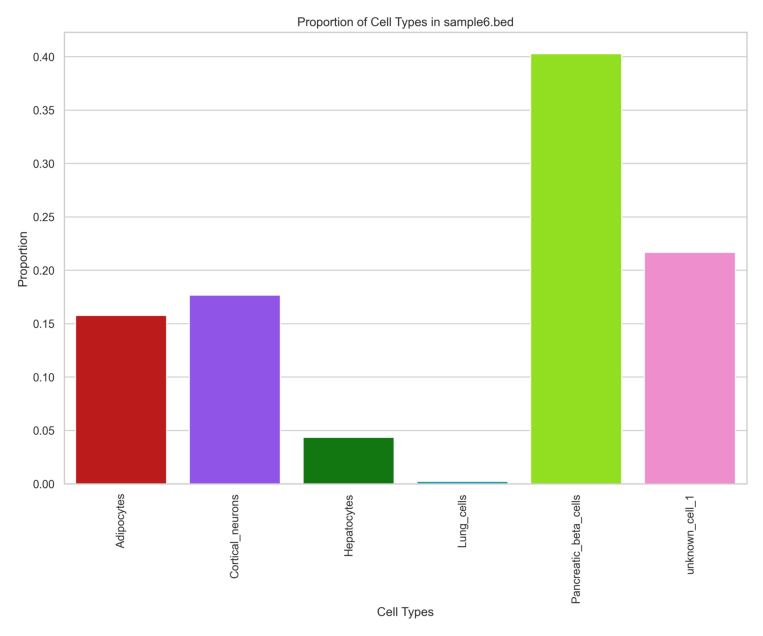

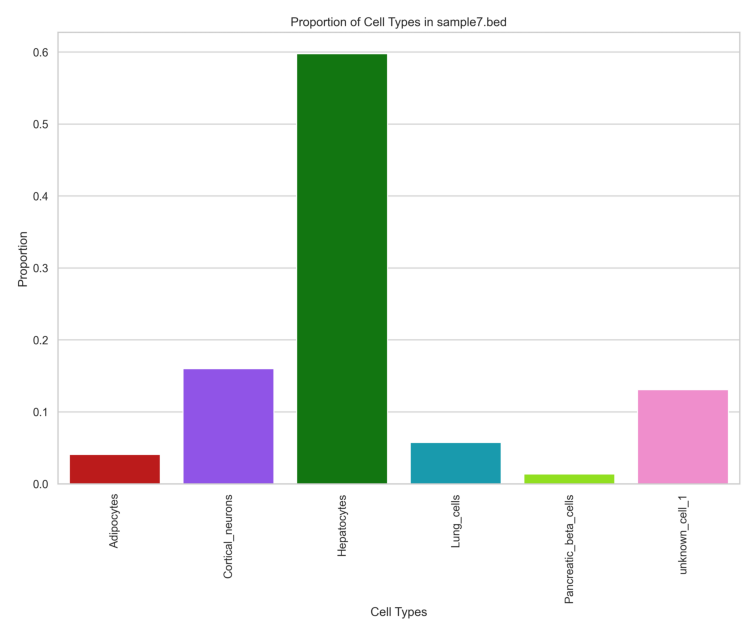

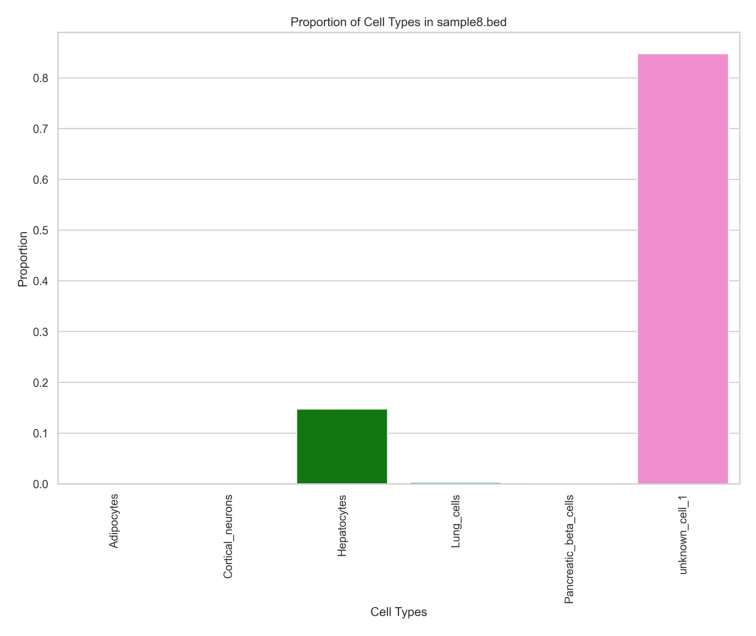

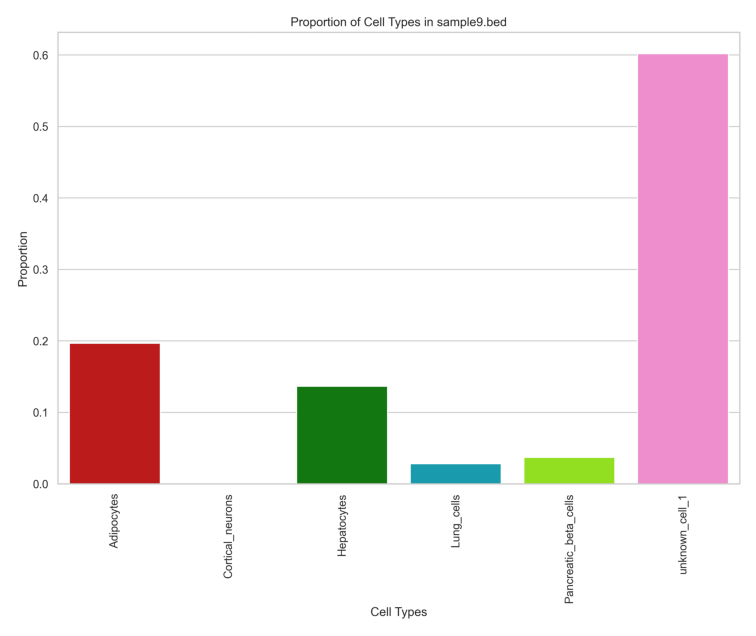

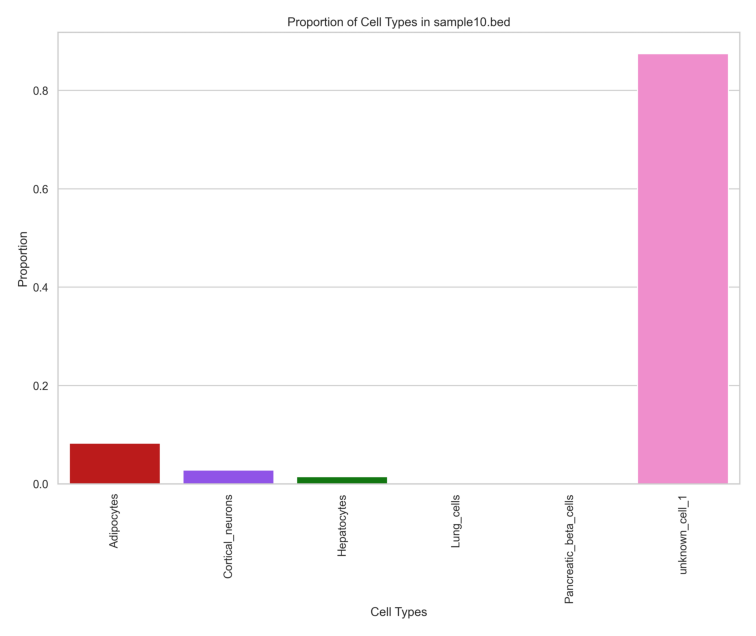

In [6]:
img = mpimg.imread('output_partial_ref/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('output_partial_ref/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Partial-reference based with purity information

We can run DeMethify when we've got purity (= 1 - unknown cells portion) information, it makes the proportions and methylation profiles estimation better. It also makes the optimisation problem identifiable for the one sample, one known cell type case. 

In [1]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq output_gen/sample{1..10}.bed \
    --nbunknown 1 \
    --init SVD \
    --purity 60 80 90 20 50 90 100 30 50 10 \
    --outdir purity \
    --bedmethyl \
    --plot 

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/DeMethify/test/purity to store results
All demethified! Results in /Users/mbourdim/Desktop/DeMethify/test/purity
Plots generated in /Users/mbourdim/Desktop/DeMethify/test/purity/plots


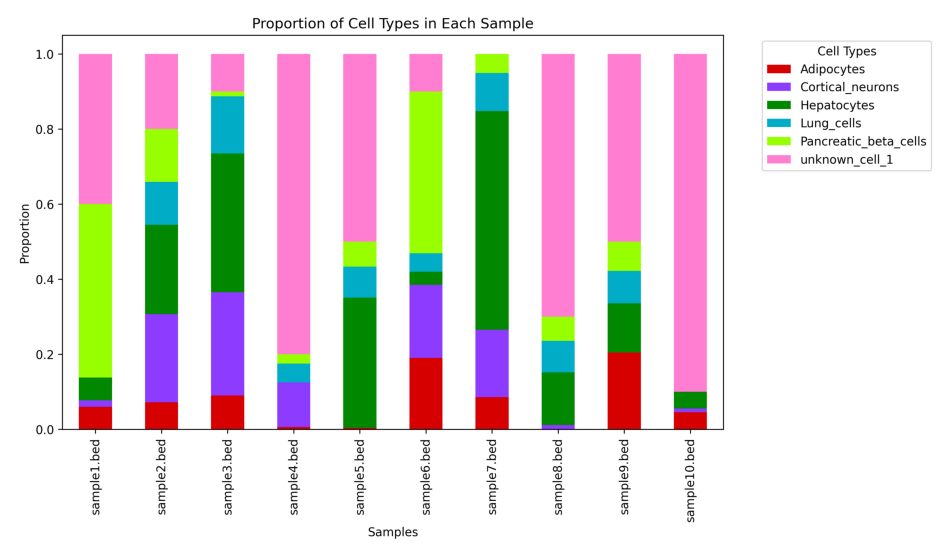

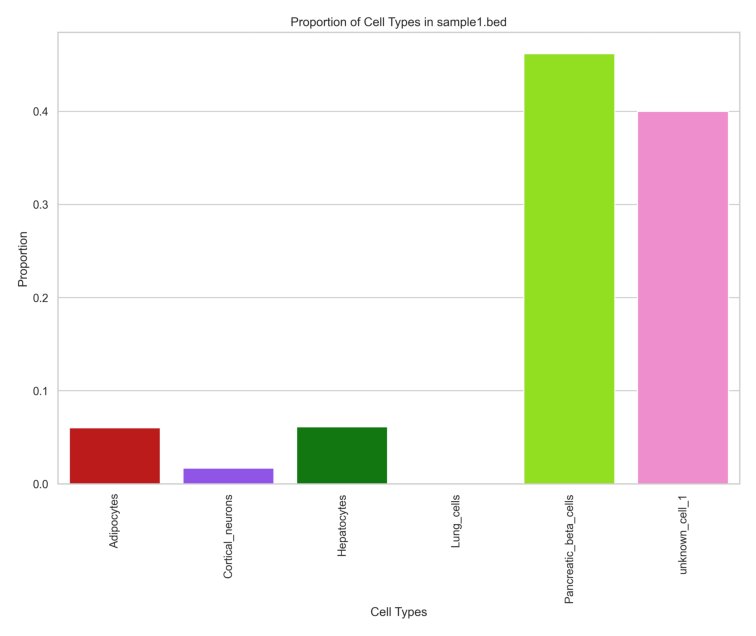

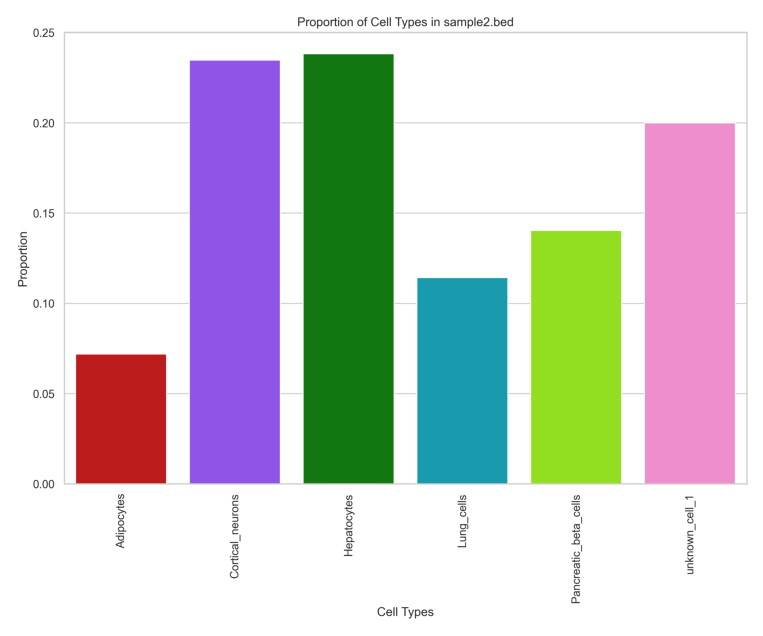

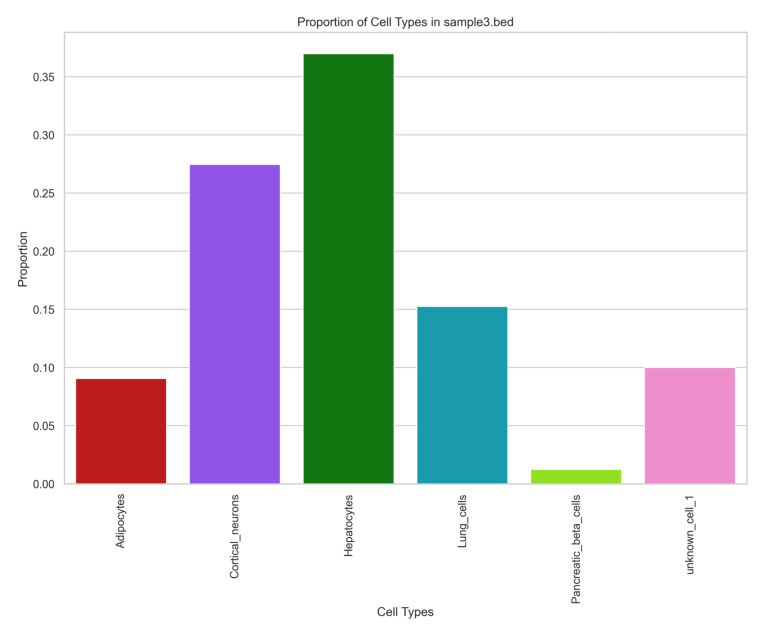

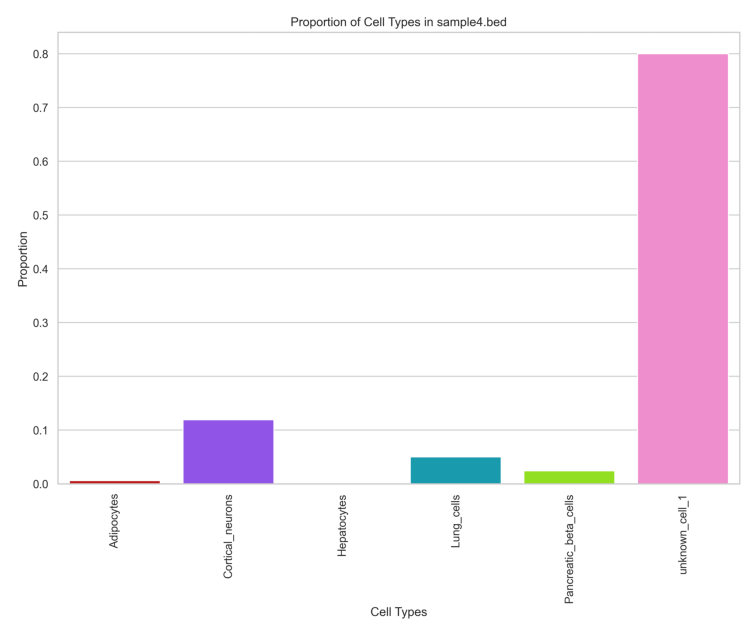

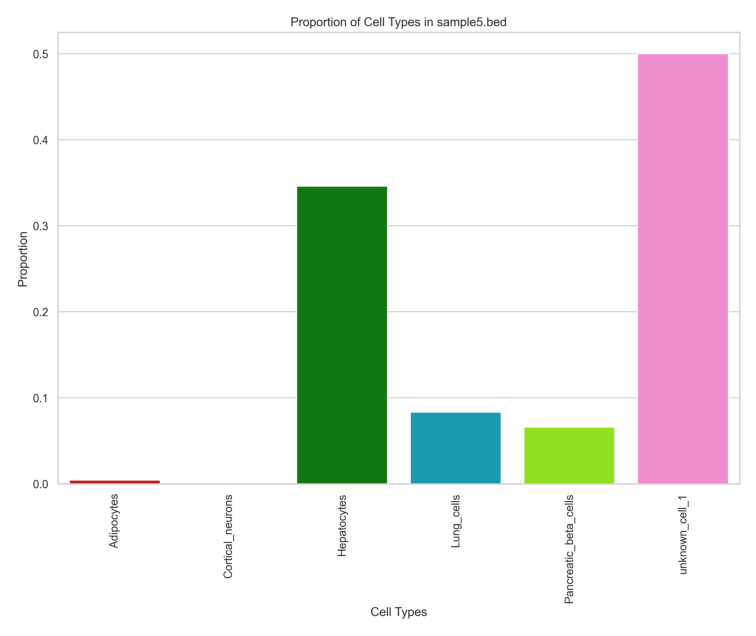

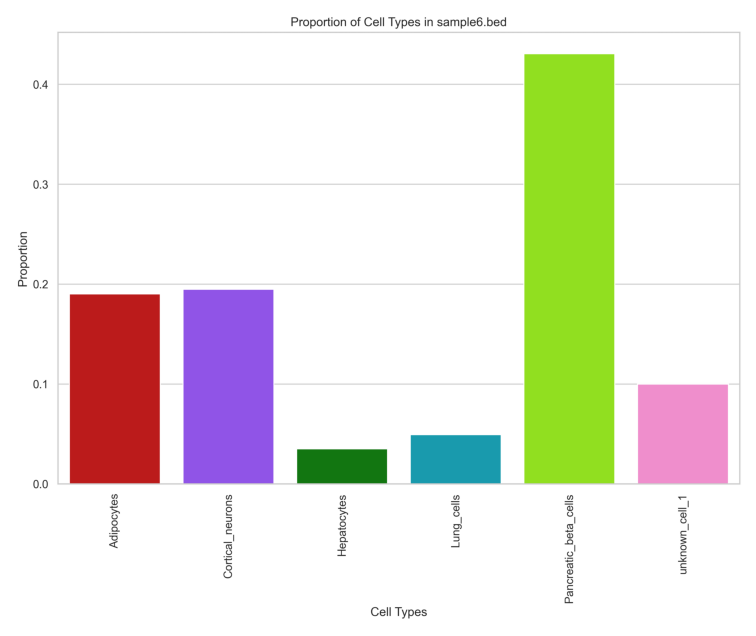

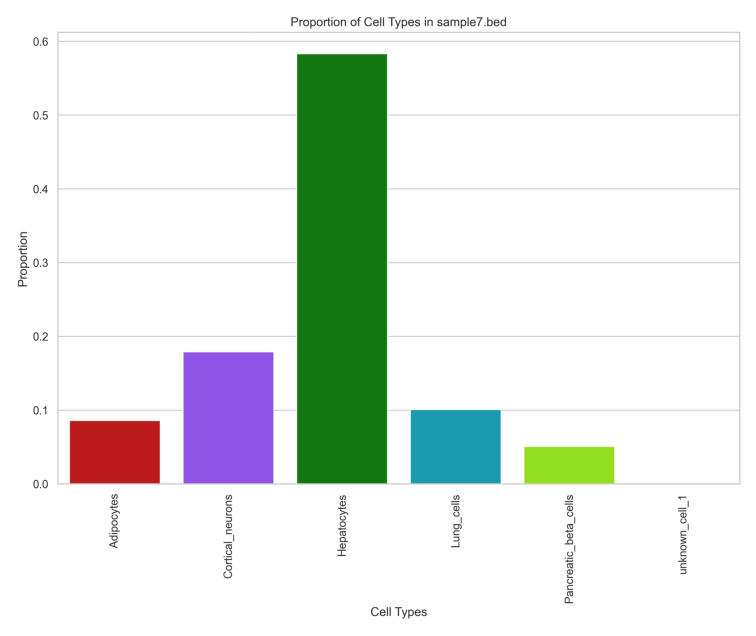

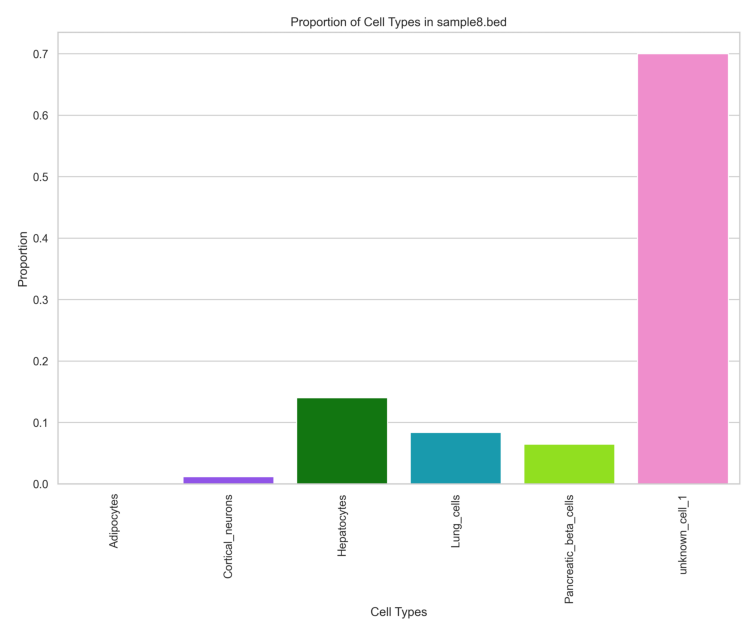

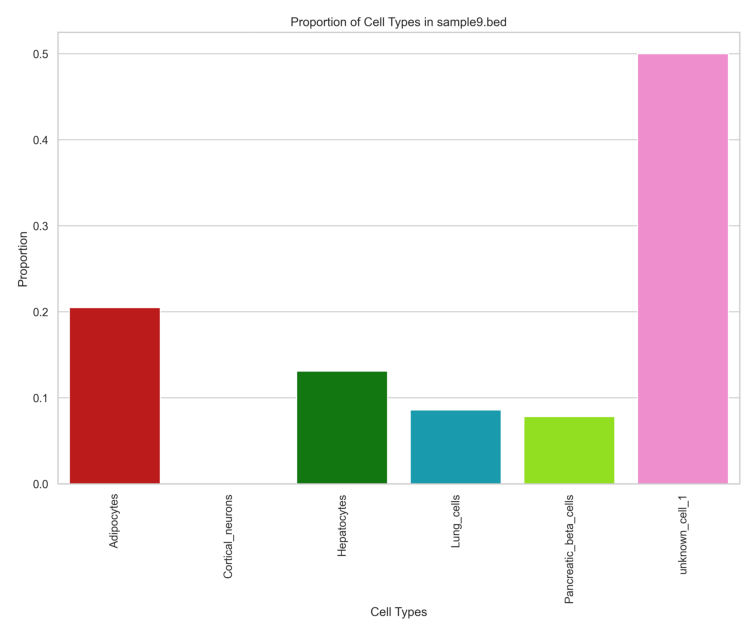

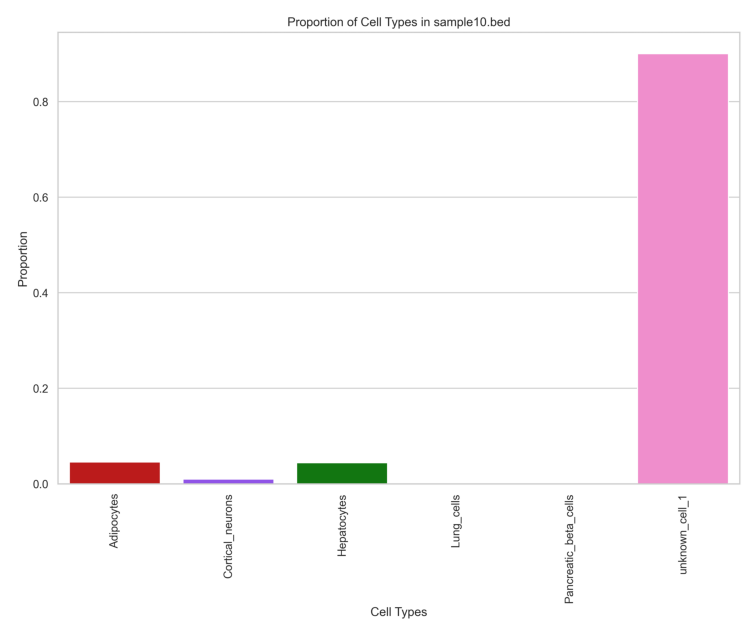

In [4]:
img = mpimg.imread('purity/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('purity/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Bootstrap confidence intervals

To obtain bootstrap confidence intervals, one can use the --confidence flag with the first argument being the confidence level in percentage (number between 0 and 100), and the second the number of boostrap iterations. 

In [11]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq output_gen/sample* \
    --nbunknown 1 \
    --init SVD \
    --confidence 95 2500 \
    --outdir ci \
    --bedmethyl \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

100%|███████████████████████████████████████| 2500/2500 [01:16<00:00, 32.61it/s]
All demethified! Results in /Users/mbourdim/Desktop/demethify_/ci
Plots generated in /Users/mbourdim/Desktop/demethify_/ci/plots


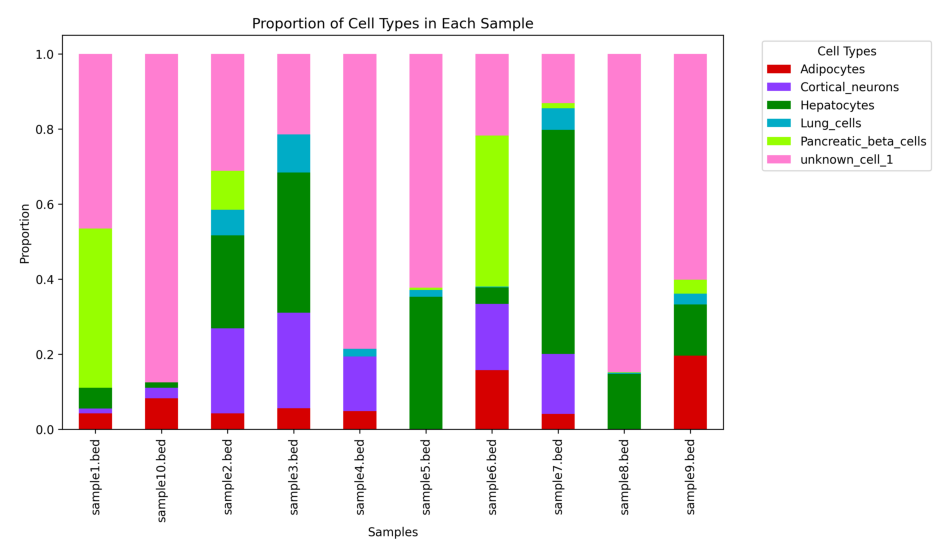

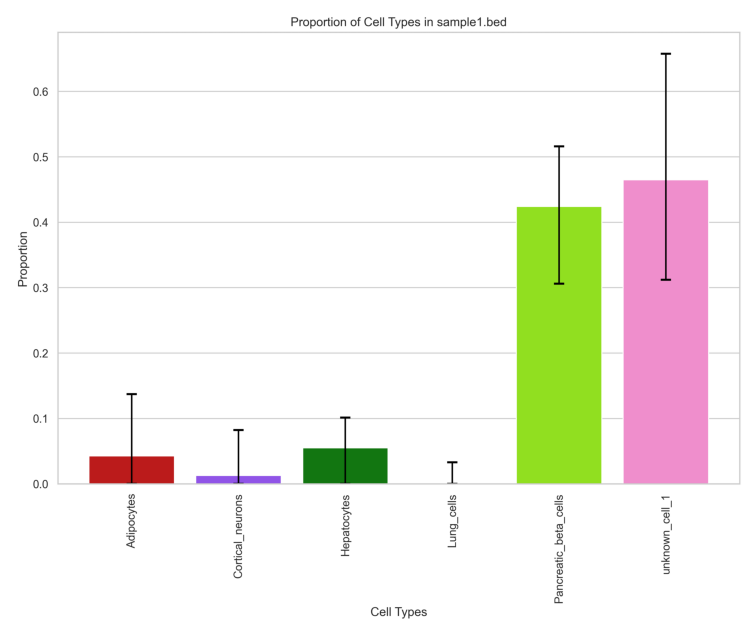

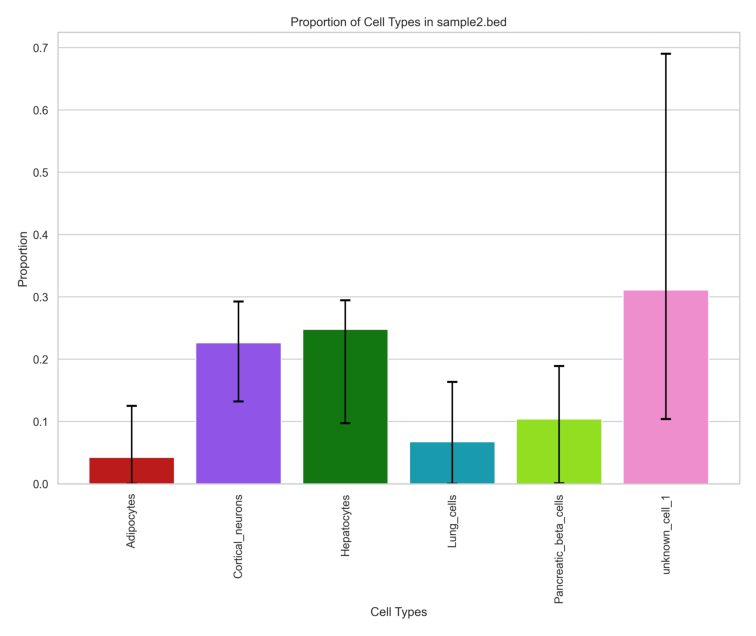

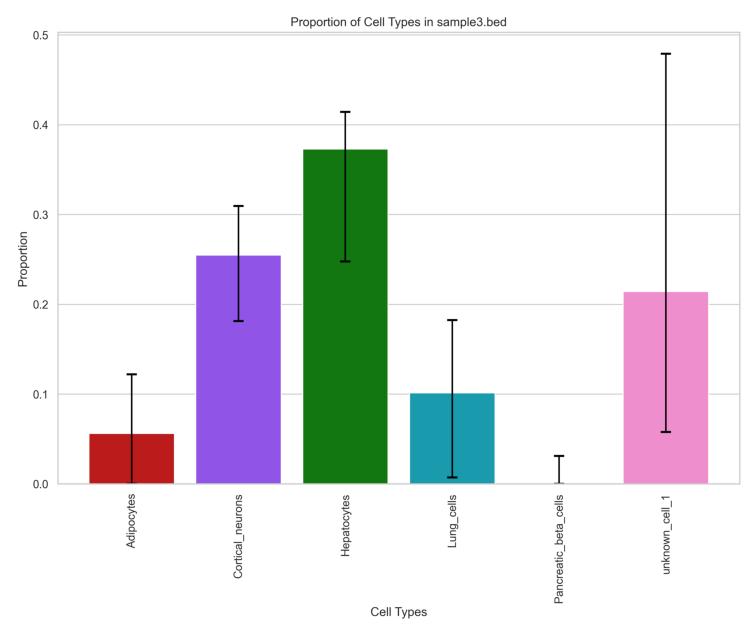

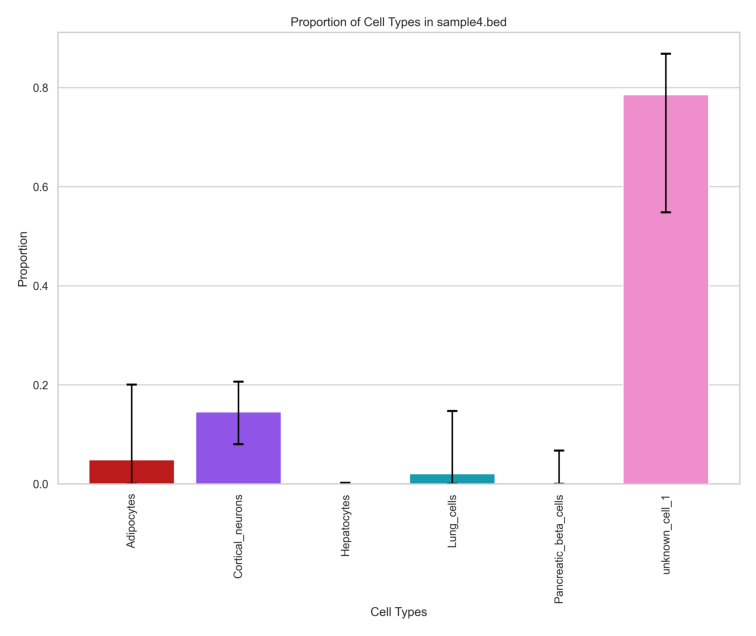

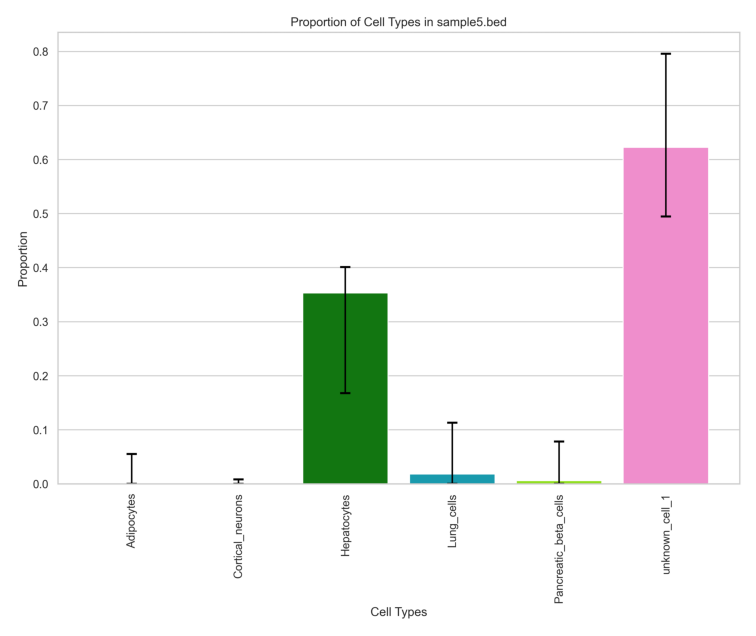

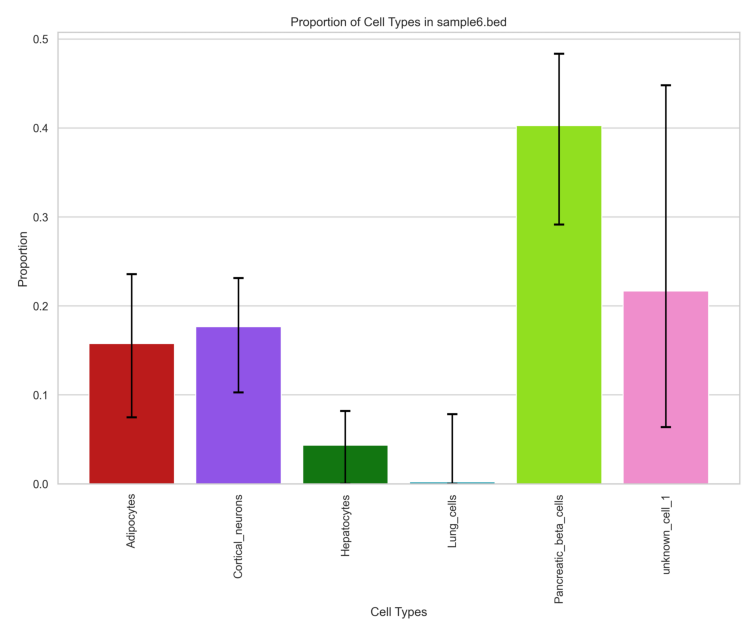

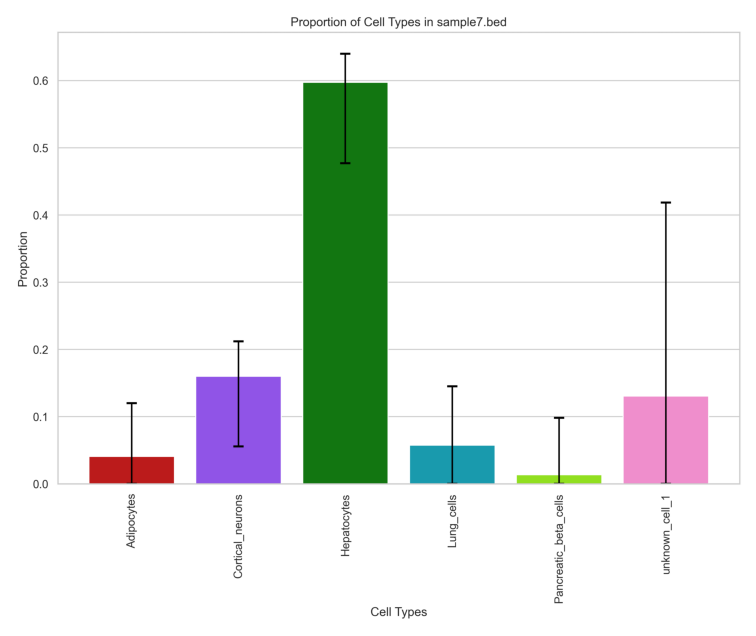

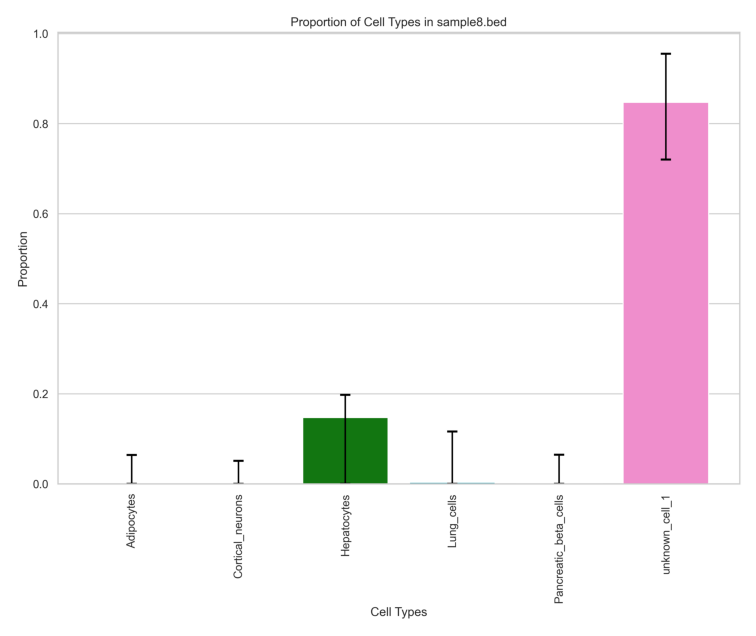

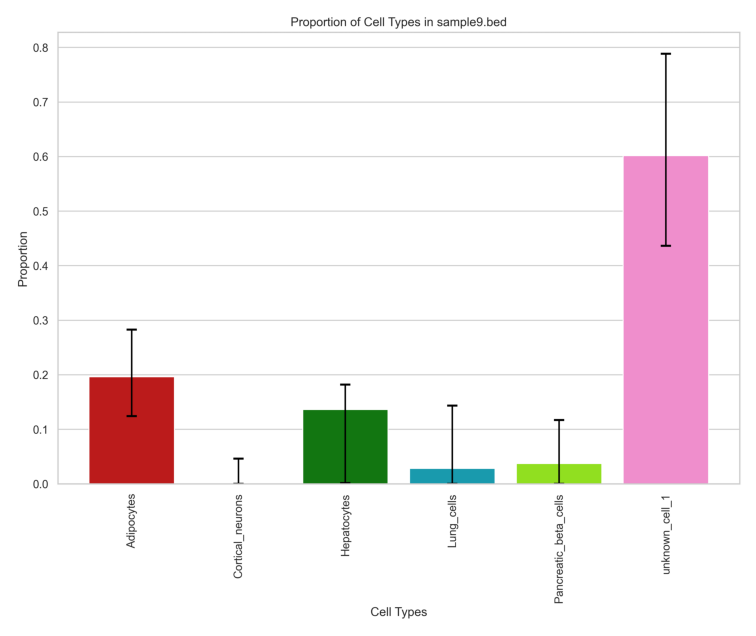

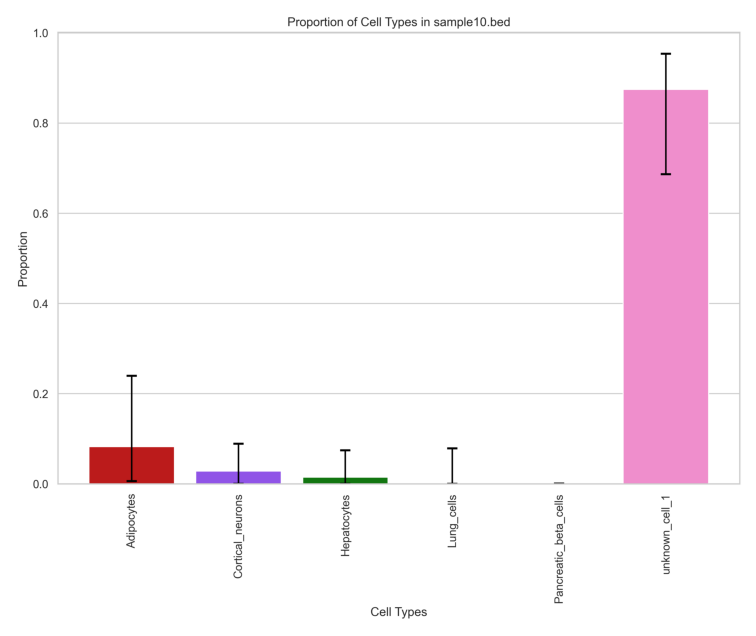

In [12]:
img = mpimg.imread('ci/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('ci/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

## Miscellaneous recommendations

- The deconvolution problem with an unknown cell type is non-identifiable for only one sample, so DeMethify with nbunknown >= 1 is better used with a number of samples of at least 2!
    - In the situation where there are several samples at once, they're assumed to share the same "unknown" methylation profile, or at least a similar one! This is quite a strong assumption.
- The use case where the user knows the purity of the sample allows for the optimisation problem to become identifiable for the one sample, one known cell type case. It can purify/denoise the sample of one cell type whose typical methylation profile we have.
- For the basic partial-reference based situation 10000, 20 seem to work well for the outer and inner loop iterations, for the case where purity is known and specified 100, 500, is much better. Indeed, the algorithm is not exactly the same. 
- Even though it can be time-intensive, it is generally recommended in the literature for 1000-5000 iterations for the bootstrap confidence interval algorithm, and to go as high as possible the higher the confidence level.